This is the LSTM Model

In [4]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, regularizers
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from helper_functions import preprocess, predictions, is_gpu_working, visualize

%matplotlib inline
plt.rcParams['figure.figsize'] = (15.0, 7.0)
is_gpu_working()

True

In [5]:
window_in = 7
window_out = 1
colsx = ['Cumulative True Cases','Free','Positively Tested','CR', 'Series_No']
colsy = ['Cumulative True Cases','Free','Positively Tested', 'Series_No']
input_shape = (window_in, len(colsx) - 1)
x_train, y_train, x_test, y_test, len_of_ser, num_windows_ser = preprocess(dataframe_csvpath = "data.csv", 
    cols_x = colsx, 
    cols_y = colsy, 
    window_in = window_in, 
    window_out = window_out, 
    data_div_frac = 0.99, 
    popu_size = 80000
)

In [8]:
def LSTM_MODEL():
    model = keras.Sequential(
        [
                               layers.LSTM(128, return_sequences=True, input_shape = input_shape, activation='selu'),
                               layers.LSTM(256, return_sequences=True, activation='selu'),
                               layers.LSTM(128, return_sequences=False, activation='relu'),
                               layers.Dense(window_out * (len(colsy)-1)),
                               layers.Reshape((window_out, (len(colsy )-1)))
        ]
    )
    print(model.summary())
    return model 

In [9]:
model = LSTM_MODEL()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_3 (LSTM)                (None, 7, 128)            68096     
_________________________________________________________________
lstm_4 (LSTM)                (None, 7, 256)            394240    
_________________________________________________________________
lstm_5 (LSTM)                (None, 128)               197120    
_________________________________________________________________
dense (Dense)                (None, 3)                 387       
_________________________________________________________________
reshape (Reshape)            (None, 1, 3)              0         
Total params: 659,843
Trainable params: 659,843
Non-trainable params: 0
_________________________________________________________________
None


In [11]:
model.compile(
    loss = 'mae',
    optimizer = keras.optimizers.Adam(),
    metrics = ['accuracy']
)

model.fit(
    x_train,
    y_train,
    batch_size = 32,
    epochs = 10,
    verbose = 2
)

model.evaluate(x_test, y_test, batch_size = 32, verbose = 2)

Epoch 1/10
11701/11701 - 977s - loss: 2.9701e-04 - accuracy: 0.8930
Epoch 2/10
11701/11701 - 992s - loss: 2.5782e-04 - accuracy: 0.9007
Epoch 3/10
11701/11701 - 968s - loss: 2.3966e-04 - accuracy: 0.9020
Epoch 4/10
11701/11701 - 953s - loss: 2.2516e-04 - accuracy: 0.9029
Epoch 5/10
11701/11701 - 958s - loss: 2.1168e-04 - accuracy: 0.9044
Epoch 6/10
11701/11701 - 954s - loss: 2.0642e-04 - accuracy: 0.9055
Epoch 7/10
11701/11701 - 961s - loss: 2.0010e-04 - accuracy: 0.9040
Epoch 8/10
11701/11701 - 992s - loss: 1.9355e-04 - accuracy: 0.9055
Epoch 9/10
11701/11701 - 974s - loss: 1.9125e-04 - accuracy: 0.9067
Epoch 10/10
11701/11701 - 957s - loss: 1.8917e-04 - accuracy: 0.9041
116/116 - 2s - loss: 2.3425e-04 - accuracy: 0.8120


[0.00023425133258569986, 0.8119913339614868]

In [12]:
y_pred, mae = predictions(x_test, y_test, model, len_of_ser, num_windows_ser, window_in = 7, window_out = 1)

The mean absolute error is:  tf.Tensor(133.71426191457942, shape=(), dtype=float64)


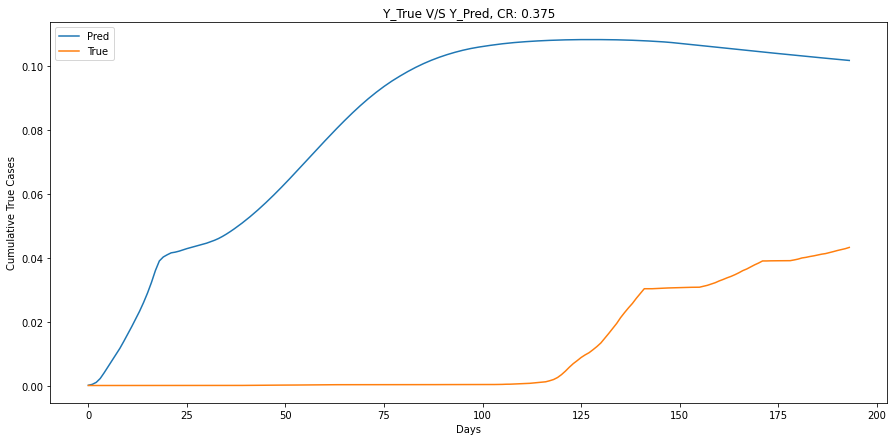

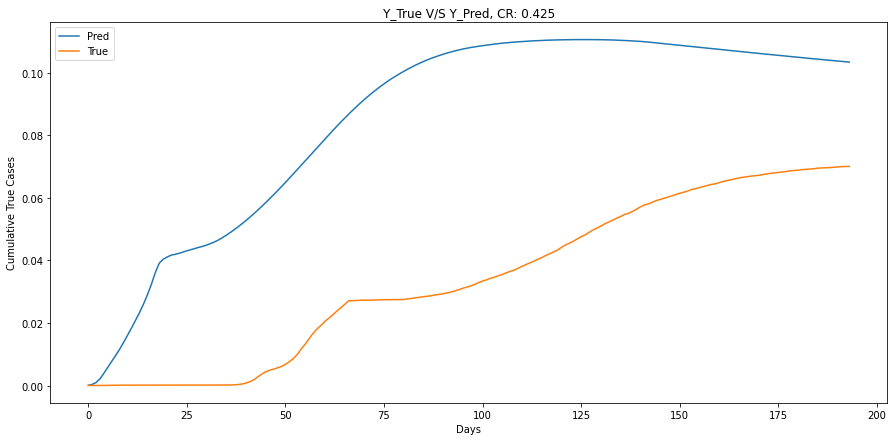

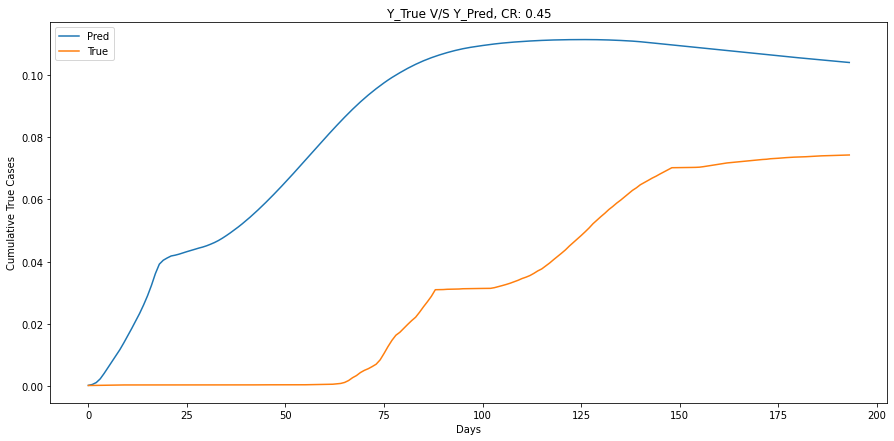

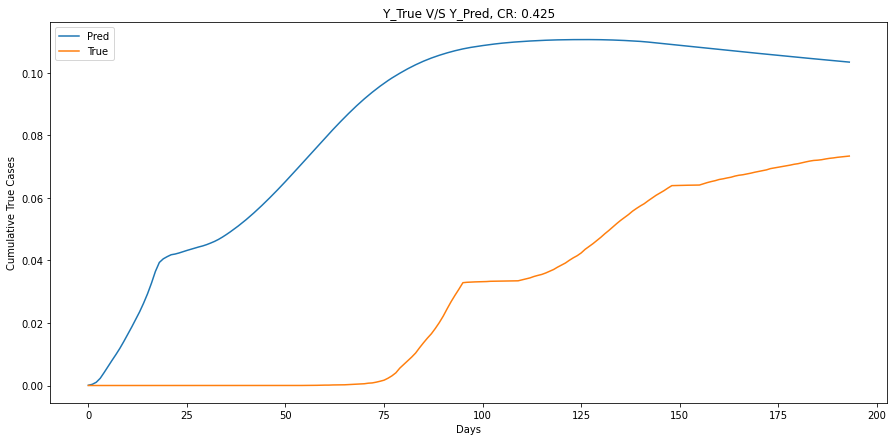

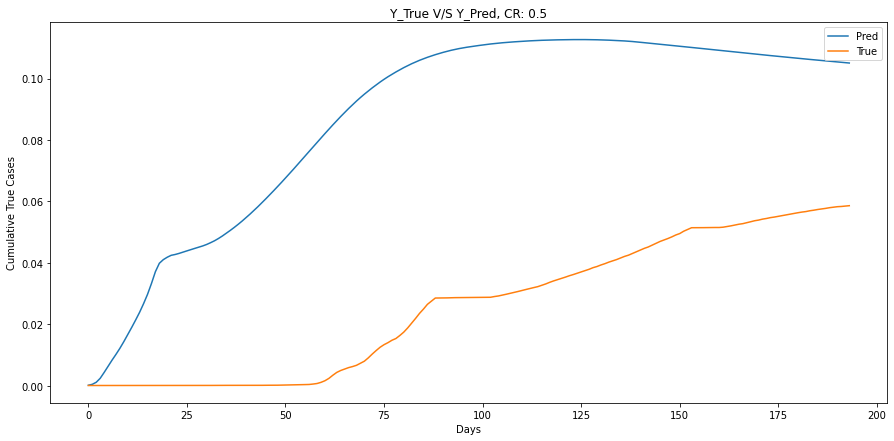

In [16]:
visualize(y_test, y_pred, x_test, window_out = window_out, num_plots = 5, num_win_ser = num_windows_ser, cols_y = colsy, col_idx = 0)